# Project Estimate Improvement

<img src="Company logo.png">

#### Galactic Instruments is an engineering company dedicated to enabling space travel. They make various products that can be used in advanced spaceships. Each Team is aligned on the products they serve. The products are:

1. Warp Engines
2. Transporters
3. Tricorders
4. Universal Translators
5. Tractor Beams
6. Photon Torpedos

#### There are also 3 different deparentments (Parent Organizations) that server different functions. The departments are:

1. Systems Engineering: Technical branch for the sales team. They work with customers to prove the equipement can meet the customers needs before purchase.
2. Support Engineering: Assist customers in troubleshooting and ensuring they are successful after the sale.
3. R&D: Research and Development are focused on creating new products, but sometimes get involved in special projects for certain customers.

## The problem

How to improve project estimates? Sales managers approve technical resouces to work on projects based on their estimates. Over estimating, means we are approving less projects, and under estimating means we are increasing the cost of doing business. Getting estimates right means teams can better manage bandwidth and better predict return on investment.  

## How much of a problem?

Lets do some analysis to determine how much of a problem this is.

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Bring in data
data = pd.read_csv('Project Estimates Scrubbed.csv', index_col='Date')
data.index = pd.to_datetime(data.index)
data['First_Estimate'] = pd.to_datetime(data['First_Estimate'])
data.sort_index(inplace=True)
data.head(5)

,First_Estimate,Days_between_estimate,EstimatedEffort,Total_Hours,Effort_over_Estimate,Parent_Team,Team_Name,Region
Date,,,,,,,,
2016-10-05,2016-10-11,6,20.0,12.5,62,Support Engineering,Tricorders,US & Canada
2016-10-05,2016-10-24,19,24.0,44.0,183,Systems Engineering,Warp Engines,US & Canada
2016-10-05,2016-11-28,54,60.0,57.5,95,Support Engineering,Warp Engines,US & Canada
2016-10-05,2016-10-11,6,7.0,5.0,71,Support Engineering,Transporters,US & Canada
2016-10-06,2016-10-19,13,24.0,2.0,8,Support Engineering,Warp Engines,US & Canada


In [68]:
#Create Bucket Functions
def days_bucket(days):
    output = ""
    if days == 0:
        output = "a. 0"
    elif days == 1:
        output = "b. 1"
    elif days == 2:
        output = "c. 2"
    elif days == 3:
        output = "d. 3"
    elif days == 4:
        output = "e. 4"
    elif days == 5:
        output = "f. 5"
    elif days == 6:
        output = "g. 6"
    elif days == 7:
        output = "h. 7"
    elif days > 7 and days <=20:
        output = "i. 7 - 20"
    elif days > 20 and days <=40:
        output = "j. 20 - 40"
    else:
        output = "k. > 40"
    
    return output

def estimate_effort_bucket(ee):
    output = ''
    if ee < 80:
        output = "a. < 80"
    elif (ee >= 80 and ee < 120):
        output = "b. 80 - 120"
    elif (ee >= 120 and ee < 200):
        output = "c. 120 - 200"
    else:
        output = "d. > 200"
    
    return output


def effort_bucket(effort):
    output = ''
    if effort <= 8:
        output = "a. < 8"
    elif (effort > 8 and effort < 20):
        output = "b. 8 - 20"
    elif (effort >= 20 and effort < 40):
        output = "c. 20 - 40"
    elif (effort >= 40 and effort < 80):
        output = "d. 40 - 80"
    else:
        output = "e. > 80"
    
    return output

In [69]:
data['Days Bucket'] = data['Days_between_estimate'].apply(lambda x: days_bucket(x))
data['Estimate Effort Bucket'] = data['Effort_over_Estimate'].apply(lambda x: estimate_effort_bucket(x))
data['Effort Bucket'] = data['EstimatedEffort'].apply(lambda x: effort_bucket(x))

### Analysis

This analysis will help narrow down where to perform the treatment. (Where the treatment will be most effective)

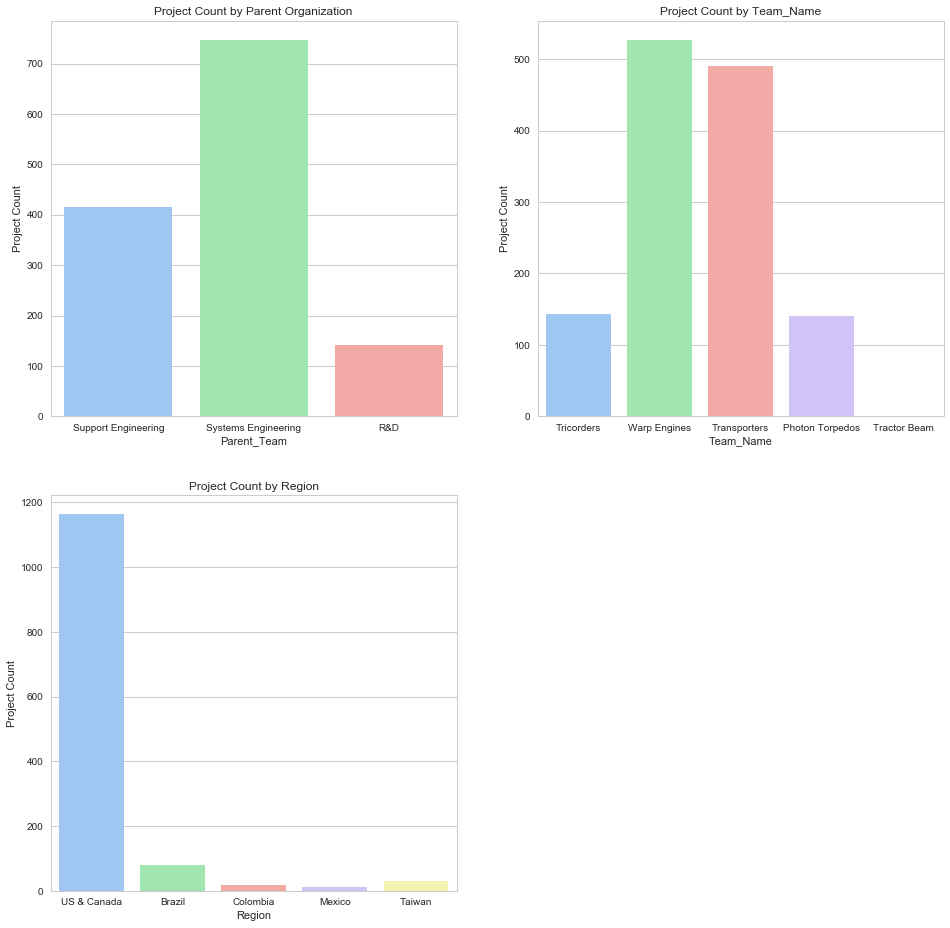

In [53]:
#Plot showing the project count
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
sns.countplot(x="Parent_Team",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Parent Organization')
plt.subplot(2, 2, 2)
sns.countplot(x="Team_Name",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Team_Name')
plt.subplot(2, 2, 3)
sns.countplot(x="Region",data=data, palette="pastel")
plt.ylabel("Project Count")
plt.title('Project Count by Region')

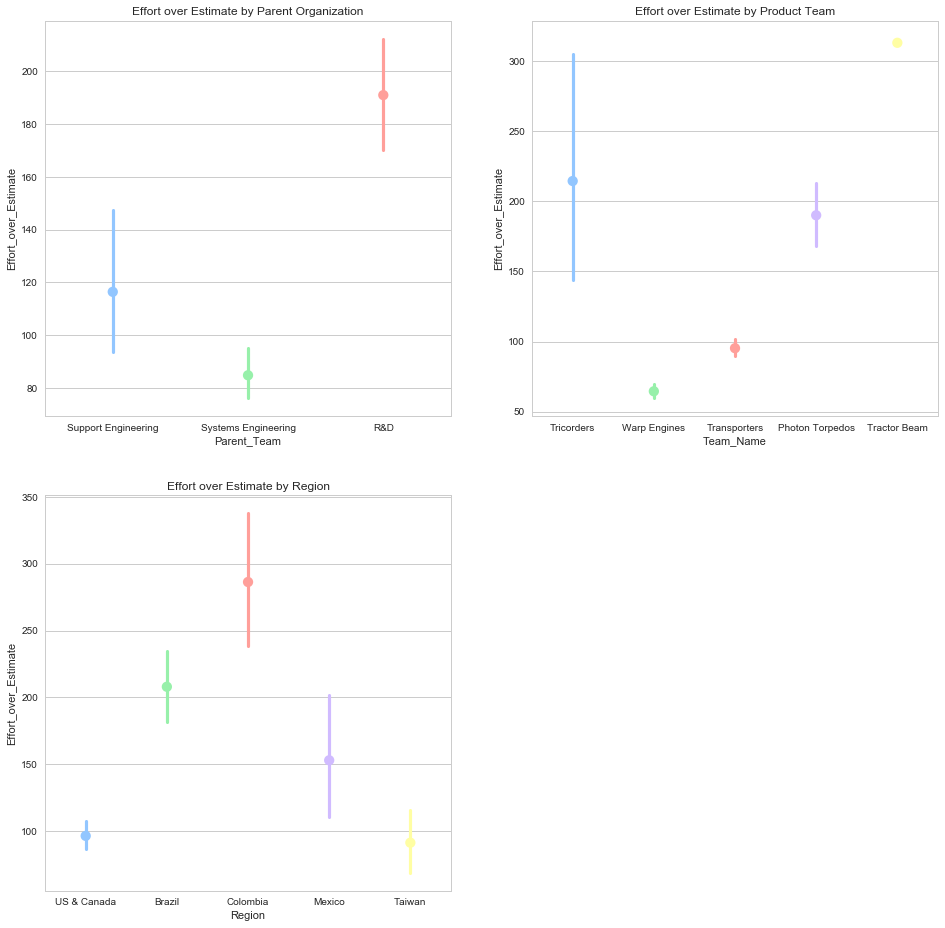

In [48]:
#Point plot showing the Effort over estimate comparisons between groups
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
sns.pointplot(x="Parent_Team", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Parent Organization')
plt.subplot(2, 2, 2)
sns.pointplot(x="Team_Name", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Product Team')
plt.subplot(2,2,3)
sns.pointplot(x="Region", y="Effort_over_Estimate",data=data, join=False, palette="pastel")
plt.ylabel("Effort_over_Estimate")
plt.title('Effort over Estimate by Region')


Even though, R&D, Colombia Region, and Tricorders are the worst offenders, they have relatively small number of projects.

Lets look at visualizations of different buckets.

### Effort Over Estimate vs. Days

In [70]:
#Does the time to make an estimate matter?
day_bucket = data.groupby(['Days Bucket', 'Estimate Effort Bucket']).count()['First_Estimate'].to_frame()
day_bucket.columns=['Count']

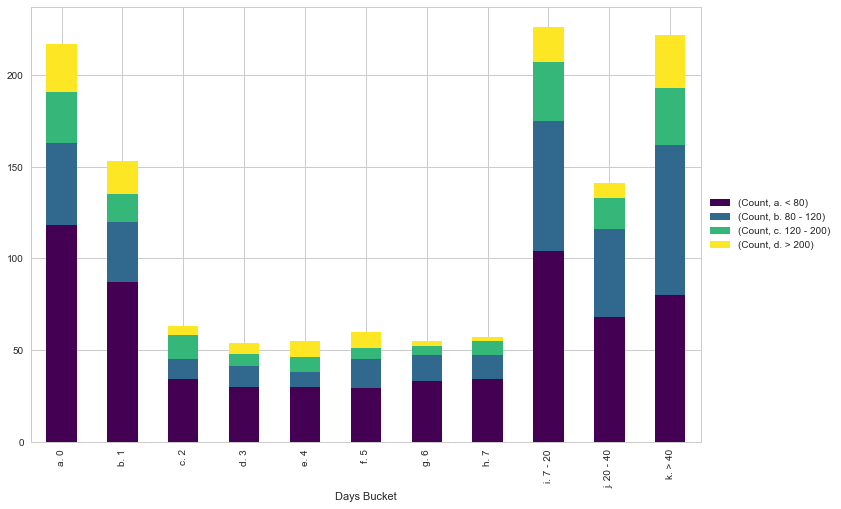

In [75]:
#Plot the count by day bucket
day_bucket.unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

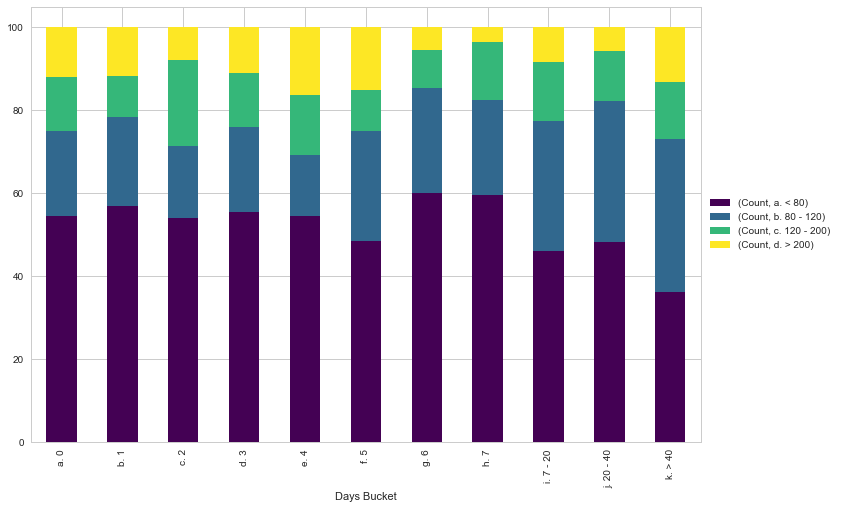

In [74]:
#Normalize by taking the percentage
day_bucket.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Pretty consistently over estimate projects. No matter how far out. There is a slight drop, but taking 40 days to do an estimate is often unacceptable. So the training should improve this as well.

### Effort over estimate vs. Effort

In [81]:
estimate_effort = data.groupby(['Effort Bucket', 'Estimate Effort Bucket']).count()['First_Estimate'].to_frame()
estimate_effort.columns=['Count']

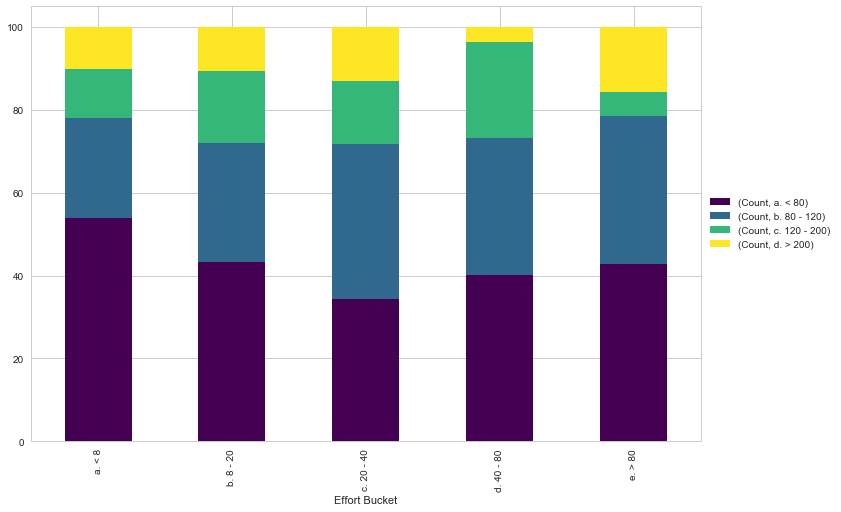

In [83]:
estimate_effort.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack().plot(kind='bar', stacked=True, figsize=(12,8), cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

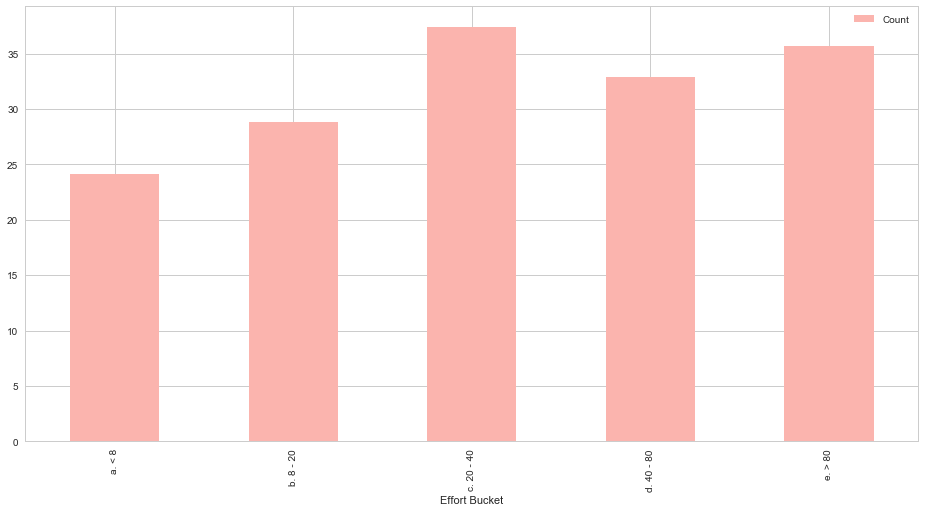

In [84]:
estimate_effort.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).xs('b. 80 - 120', level='Estimate Effort Bucket').plot(kind='bar', figsize=(16,8), cmap='Pastel1')

## Hypothesis

Creating and deploying estimate training will improve estimates.